C:\Users\nasreenn\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


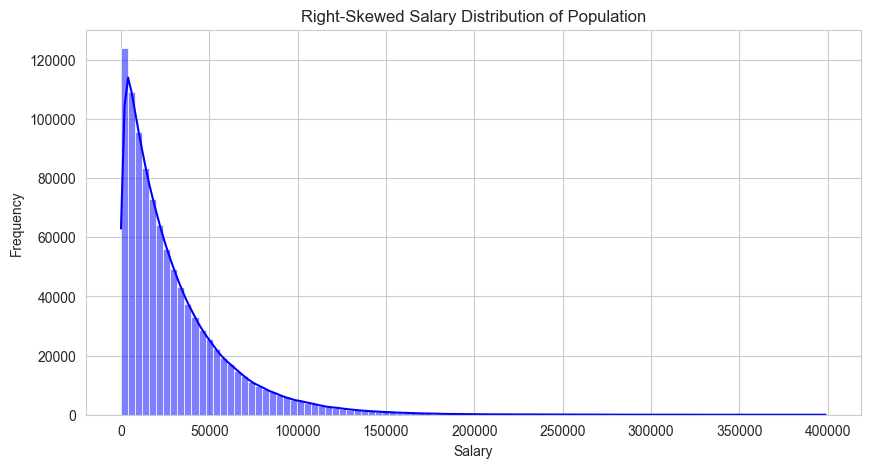

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate a Right-Skewed Salary Distribution (Synthetic Data)
np.random.seed(42)  # For reproducibility

# Creating a skewed salary distribution using exponential distribution
population_size = 1_000_000  # 1 million people
skewed_salaries = np.random.exponential(scale=30000, size=population_size)  # Avg. salary around 30K (In this case, we already know the population salary as we have to comare it will the salary that CLT will generate)

# Step 2: Visualizing the Skewed Population Distribution
plt.figure(figsize=(10, 5))
sns.histplot(skewed_salaries, bins=100, kde=True, color='blue')
plt.title('Right-Skewed Salary Distribution of Population')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

C:\Users\nasreenn\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


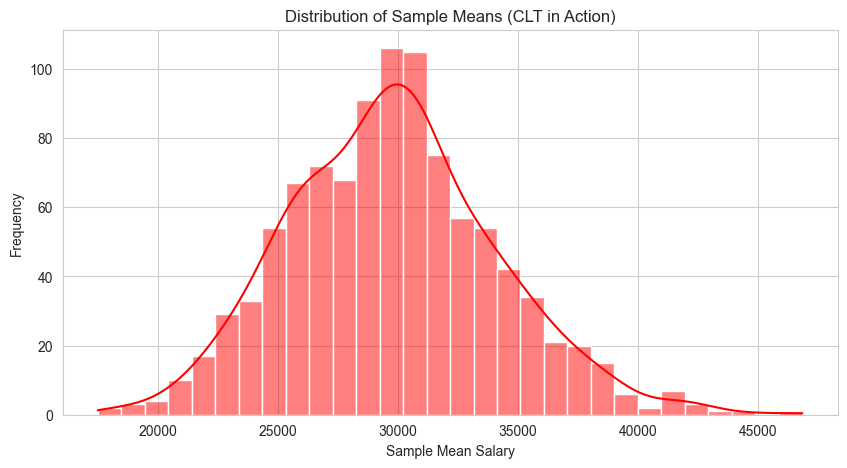

In [9]:
# Step 3: Apply CLT by Taking Multiple Random Samples
num_samples = 1000  # Number of samples to draw
sample_size = 50  # Each sample consists of 50 people
sample_means = []  # List to store sample means

for _ in range(num_samples):
    sample = np.random.choice(skewed_salaries, size=sample_size, replace=False)  # Random sample
    sample_means.append(np.mean(sample))  # Compute sample mean

# Step 4: Visualizing the Distribution of Sample Means
plt.figure(figsize=(10, 5))
sns.histplot(sample_means, bins=30, kde=True, color='red')
plt.title('Distribution of Sample Means (CLT in Action)')
plt.xlabel('Sample Mean Salary')
plt.ylabel('Frequency')
plt.show()

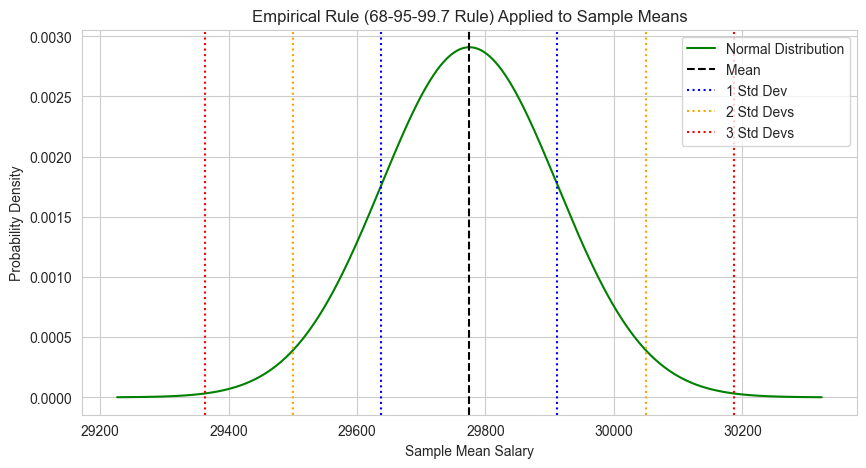

In [12]:
# Step 5: Visualizing the Empirical Rule (68-95-99.7 Rule)
x = np.linspace(mean_of_sample_means - 4*std_error, mean_of_sample_means + 4*std_error, 1000)
y = (1 / (std_error * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_of_sample_means) / std_error) ** 2)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Normal Distribution', color='green')
plt.axvline(mean_of_sample_means, color='black', linestyle='dashed', label='Mean')
plt.axvline(mean_of_sample_means - std_error, color='blue', linestyle='dotted', label='1 Std Dev')
plt.axvline(mean_of_sample_means + std_error, color='blue', linestyle='dotted')
plt.axvline(mean_of_sample_means - 2*std_error, color='orange', linestyle='dotted', label='2 Std Devs')
plt.axvline(mean_of_sample_means + 2*std_error, color='orange', linestyle='dotted')
plt.axvline(mean_of_sample_means - 3*std_error, color='red', linestyle='dotted', label='3 Std Devs')
plt.axvline(mean_of_sample_means + 3*std_error, color='red', linestyle='dotted')
plt.title('Empirical Rule (68-95-99.7 Rule) Applied to Sample Means')
plt.xlabel('Sample Mean Salary')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [10]:
# Step 6: Compute Confidence Interval
mean_of_sample_means = np.mean(sample_means)  # Average of sample means
std_dev_of_sample_means = np.std(sample_means, ddof=1)  # Standard deviation of sample means
std_error = std_dev_of_sample_means / np.sqrt(num_samples)  # Standard error
confidence_interval = (mean_of_sample_means - 2 * std_error, mean_of_sample_means + 2 * std_error)

# Step 7: Estimate Population Salary using CLT
estimated_population_salary = mean_of_sample_means

# Print results
print(f"Estimated Population Mean Salary: ₹{estimated_population_salary:,.2f}")
print(f"95% Confidence Interval: ₹{confidence_interval[0]:,.2f} to ₹{confidence_interval[1]:,.2f}")

# Step 8: Compare with True Population Mean
true_population_mean = np.mean(skewed_salaries)
print(f"True Population Mean Salary: ₹{true_population_mean:,.2f}")

Estimated Population Mean Salary: ₹29,775.00
95% Confidence Interval: ₹29,500.76 to ₹30,049.24
True Population Mean Salary: ₹30,033.41
